In [1]:
import pandas as pd
from matplotlib import  pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df  =  pd.read_csv("Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2414,9621-OUPYD,Female,0,Yes,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.20,507.9,No
3571,8980-WQFWL,Female,0,No,No,35,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,62.10,2096.1,No
3846,1767-TGTKO,Female,0,Yes,Yes,8,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.45,411.75,No
2713,5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
1104,8717-VCTXJ,Male,0,No,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.55,839.4,No


In [3]:
df.drop('customerID' , axis = 'columns' , inplace = True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# to convert the datataype of TotalCharges attribute from object to float
pd.to_numeric(df.TotalCharges , errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
# there are some null values present in TotalCharges attributes to check them
df[pd.to_numeric(df.TotalCharges , errors = 'coerce').isnull()].shape

(11, 20)

In [7]:
df1 =  df[df.TotalCharges != ' '] 
df1.shape

(7032, 20)

In [8]:
df1.dtypes
pd.to_numeric(df1.TotalCharges)
 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [9]:
df1.TotalCharges.dtype

dtype('O')

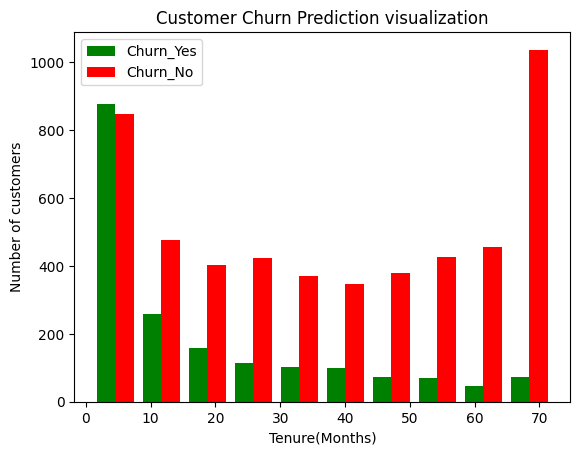

In [10]:
tenure_churn_no  =  df1[df1.Churn == "No"].tenure
tenure_churn_yes  =  df1[df1.Churn == "Yes"].tenure

plt.xlabel("Tenure(Months)")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction visualization")

plt.hist([tenure_churn_yes  , tenure_churn_no] ,  color  = ['green' , 'red'] , label  = ['Churn_Yes'  , 'Churn_No'])
plt.legend()

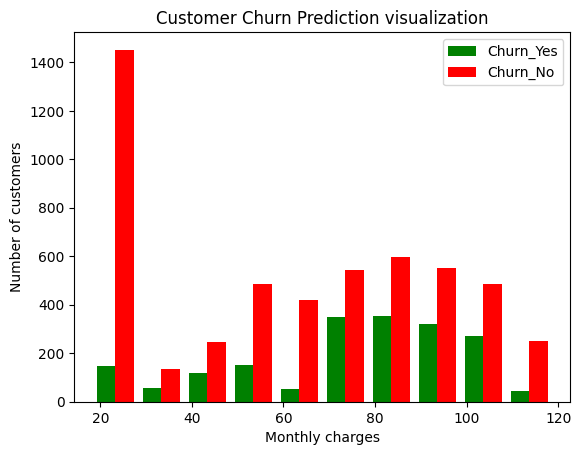

In [11]:
tenure_churn_no  =  df1[df1.Churn == "No"].MonthlyCharges
tenure_churn_yes  =  df1[df1.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction visualization")

plt.hist([tenure_churn_yes  , tenure_churn_no] ,  color  = ['green' , 'red'] , label  = ['Churn_Yes'  , 'Churn_No'])
plt.legend()

In [12]:
 def print_unique(df):
    for column in df:
      if df[column].dtypes == 'object':
         print(f'{column}  : {df[column].unique()}')

In [13]:
print_unique(df1)

gender  : ['Female' 'Male']
Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
PhoneService  : ['No' 'Yes']
MultipleLines  : ['No phone service' 'No' 'Yes']
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : ['No' 'Yes' 'No internet service']
OnlineBackup  : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport  : ['No' 'Yes' 'No internet service']
StreamingTV  : ['No' 'Yes' 'No internet service']
StreamingMovies  : ['No' 'Yes' 'No internet service']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : ['No' 'Yes']


In [14]:
df1.replace('No internet service'  , 'No'  , inplace = True)
df1.replace('No phone service'  , 'No'  , inplace = True)

C:\Users\ps271\AppData\Local\Temp\ipykernel_19296\253060482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service'  , 'No'  , inplace = True)
C:\Users\ps271\AppData\Local\Temp\ipykernel_19296\253060482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service'  , 'No'  , inplace = True)


In [15]:
print_unique(df1)

gender  : ['Female' 'Male']
Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
PhoneService  : ['No' 'Yes']
MultipleLines  : ['No' 'Yes']
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : ['No' 'Yes']
OnlineBackup  : ['Yes' 'No']
DeviceProtection  : ['No' 'Yes']
TechSupport  : ['No' 'Yes']
StreamingTV  : ['No' 'Yes']
StreamingMovies  : ['No' 'Yes']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : ['No' 'Yes']


## Convert Yes and No to 1 or 0

In [16]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ps271\AppData\Local\Temp\ipykernel_19296\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [17]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [18]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ps271\AppData\Local\Temp\ipykernel_19296\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [19]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [20]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
624,1,0,0,0,7,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
5748,1,0,0,0,21,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1903,0,0,0,0,3,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
904,0,0,1,1,67,1,0,1,1,1,...,True,False,False,False,False,True,False,True,False,False


In [22]:
yes_no_columns = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
for col in yes_no_columns:
   df2[col] = df2[col].astype(int)

In [23]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2890,1,1,1,1,47,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1565,1,0,0,0,55,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5454,1,1,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6503,0,0,1,1,70,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0


In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [27]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [28]:
X_train.shape

(5625, 26)

In [29]:
X_test.shape

(1407, 26)

In [30]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [31]:
len(X_train.columns)

26

In [33]:
import tensorflow as tf
from tensorflow import keras

# Relu =  rectified linear unit
model  =  keras.Sequential([
    keras.layers.Dense(20 , input_shape = (26,) , activation ="relu"), 
    keras.layers.Dense(1, activation = 'sigmoid'),])#output layer


## Optimizers are techniques or algorithms used to decrease loss (an error)
# by tuning various parameters and weights, hence minimizing the loss
# function, providing better accuracy of model faster. 

# optimizer used - Adams (adaptive moment estimation)

model.compile(optimizer ='adam' , loss  = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(X_train  , y_train , epochs  =  100)



Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5223 - accuracy: 0.7452
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4332 - accuracy: 0.7936
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4173 - accuracy: 0.8050
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4085 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8208
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8199
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8219
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8201
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8219
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8219
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8217
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.8215
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3857 - accuracy: 0.8204
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3853 - accuracy: 

In [34]:
pred =  model.predict(X_test)
pred[:10]

44/44 [==============================] - 0s 1ms/step


array([[0.34289905],
       [0.44116032],
       [0.01133562],
       [0.73887813],
       [0.5824555 ],
       [0.83784044],
       [0.0705732 ],
       [0.48940977],
       [0.25123712],
       [0.20177351]], dtype=float32)

In [35]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [36]:
y_pred = []
for element in pred:
    if element > 0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
        

In [45]:
print("Actual value:" , list(y_test[:10]))
print("Predicted Values:",list(y_pred[:10]))



Actual value: [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
Predicted Values: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test  , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       999
           1       0.66      0.58      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

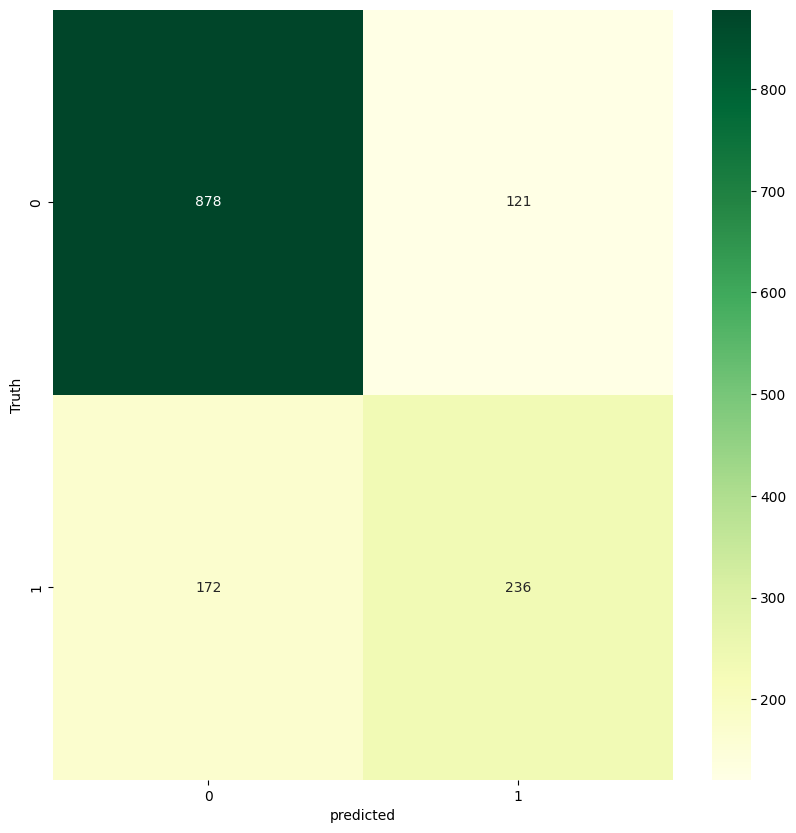

In [56]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(labels = y_test , predictions  = y_pred)
plt.figure(figsize = (10,10))
sn.heatmap(confusion_matrix  , annot  = True  , fmt  ='d',cmap="YlGn", cbar  = True) 
plt.xlabel("predicted")
plt.ylabel("Truth")